In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Train shape: (18524, 9)
Test shape: (6175, 8)
Train head:


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


Train info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB
None
Missing values (train):
id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
D

C:\Users\ssing\AppData\Local\Temp\ipykernel_33840\4006118322.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='Personality', palette='coolwarm')


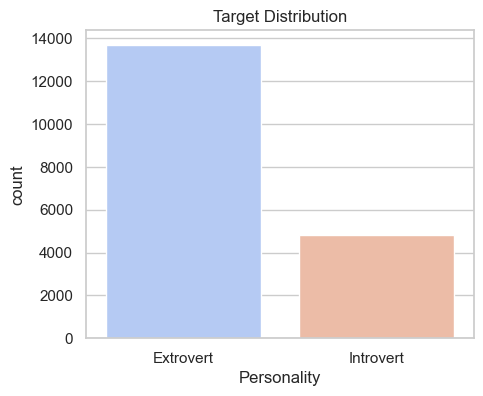

Numerical features: ['id', 'Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
Categorical features: ['Stage_fear', 'Drained_after_socializing']
Numerical feature summary:


,count,mean,std,min,25%,50%,75%,max
id,18524.0,9261.500000,5347.562529,0.0,4630.75,9261.5,13892.25,18523.0
Time_spent_Alone,17334.0,3.137764,3.003786,0.0,1.00,2.0,4.00,11.0
Social_event_attendance,17344.0,5.265106,2.753359,0.0,3.00,5.0,8.00,10.0
Going_outside,17058.0,4.044319,2.062580,0.0,3.00,4.0,6.00,7.0
Friends_circle_size,17470.0,7.996737,4.223484,0.0,5.00,8.0,12.00,15.0
Post_frequency,17260.0,4.982097,2.879139,0.0,3.00,5.0,7.00,10.0


Categorical feature summary:
Stage_fear -> unique: 2, top: No
Drained_after_socializing -> unique: 2, top: No


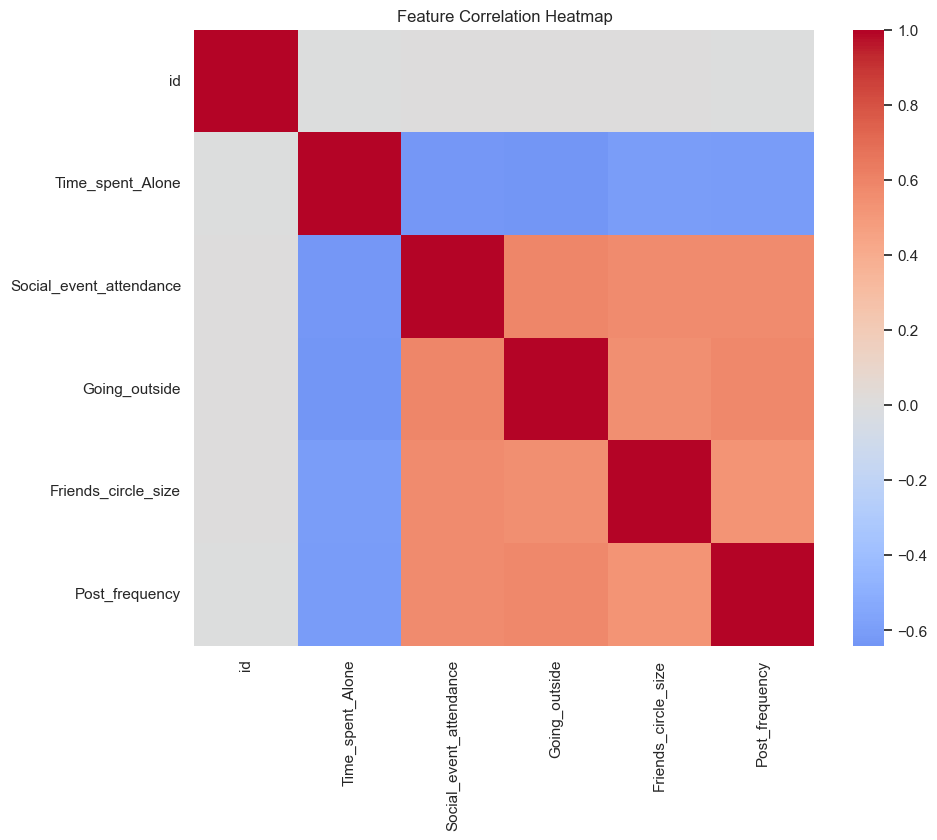

C:\Users\ssing\AppData\Local\Temp\ipykernel_33840\4006118322.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x=target, y=num_features[0], palette='viridis')


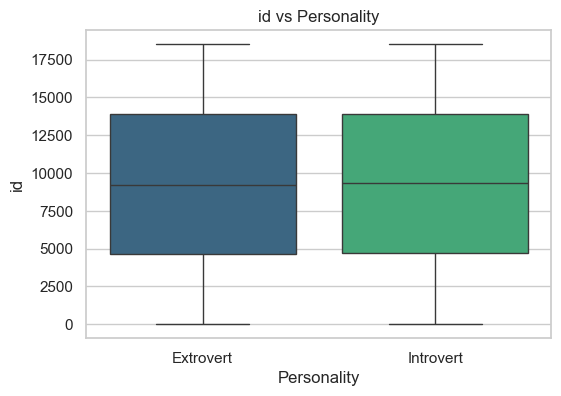

In [5]:
# =============================
# 1. Import libraries
# =============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

# =============================
# 2. Load data
# =============================
train = pd.read_csv("kaggle/train.csv")
test = pd.read_csv("kaggle/test.csv")

print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

# =============================
# 3. Quick preview
# =============================
print("Train head:")
display(train.head())

print("Train info():")
print(train.info())

print("Missing values (train):")
print(train.isnull().sum())

print("Target value counts:")
print(train['Personality'].value_counts(normalize=True))

# =============================
# 4. Visualize target balance
# =============================
plt.figure(figsize=(5,4))
sns.countplot(data=train, x='Personality', palette='coolwarm')
plt.title("Target Distribution")
plt.show()

# =============================
# 5. Identify feature types
# =============================
target = 'Personality'
features = [col for col in train.columns if col != target]

num_features = train[features].select_dtypes(include=['int64', 'float64']).columns
cat_features = train[features].select_dtypes(include=['object']).columns

print("Numerical features:", list(num_features))
print("Categorical features:", list(cat_features))

# =============================
# 6. Summary stats
# =============================
print("Numerical feature summary:")
display(train[num_features].describe().T)

print("Categorical feature summary:")
for col in cat_features:
    print(f"{col} -> unique: {train[col].nunique()}, top: {train[col].value_counts().index[0]}")

# =============================
# 7. Correlation heatmap (numerical only)
# =============================
if len(num_features) > 1:
    plt.figure(figsize=(10,8))
    corr = train[num_features].corr()
    sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
    plt.title("Feature Correlation Heatmap")
    plt.show()

# =============================
# 8. Example feature-target relationship
# =============================
if len(num_features) > 0:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=train, x=target, y=num_features[0], palette='viridis')
    plt.title(f"{num_features[0]} vs {target}")
    plt.show()

# Pairplot for a quick feel (optional, may be slow if many features)
# sns.pairplot(train, hue=target, vars=num_features[:4], diag_kind='kde')
# plt.show()

Note: you may need to restart the kernel to use updated packages.


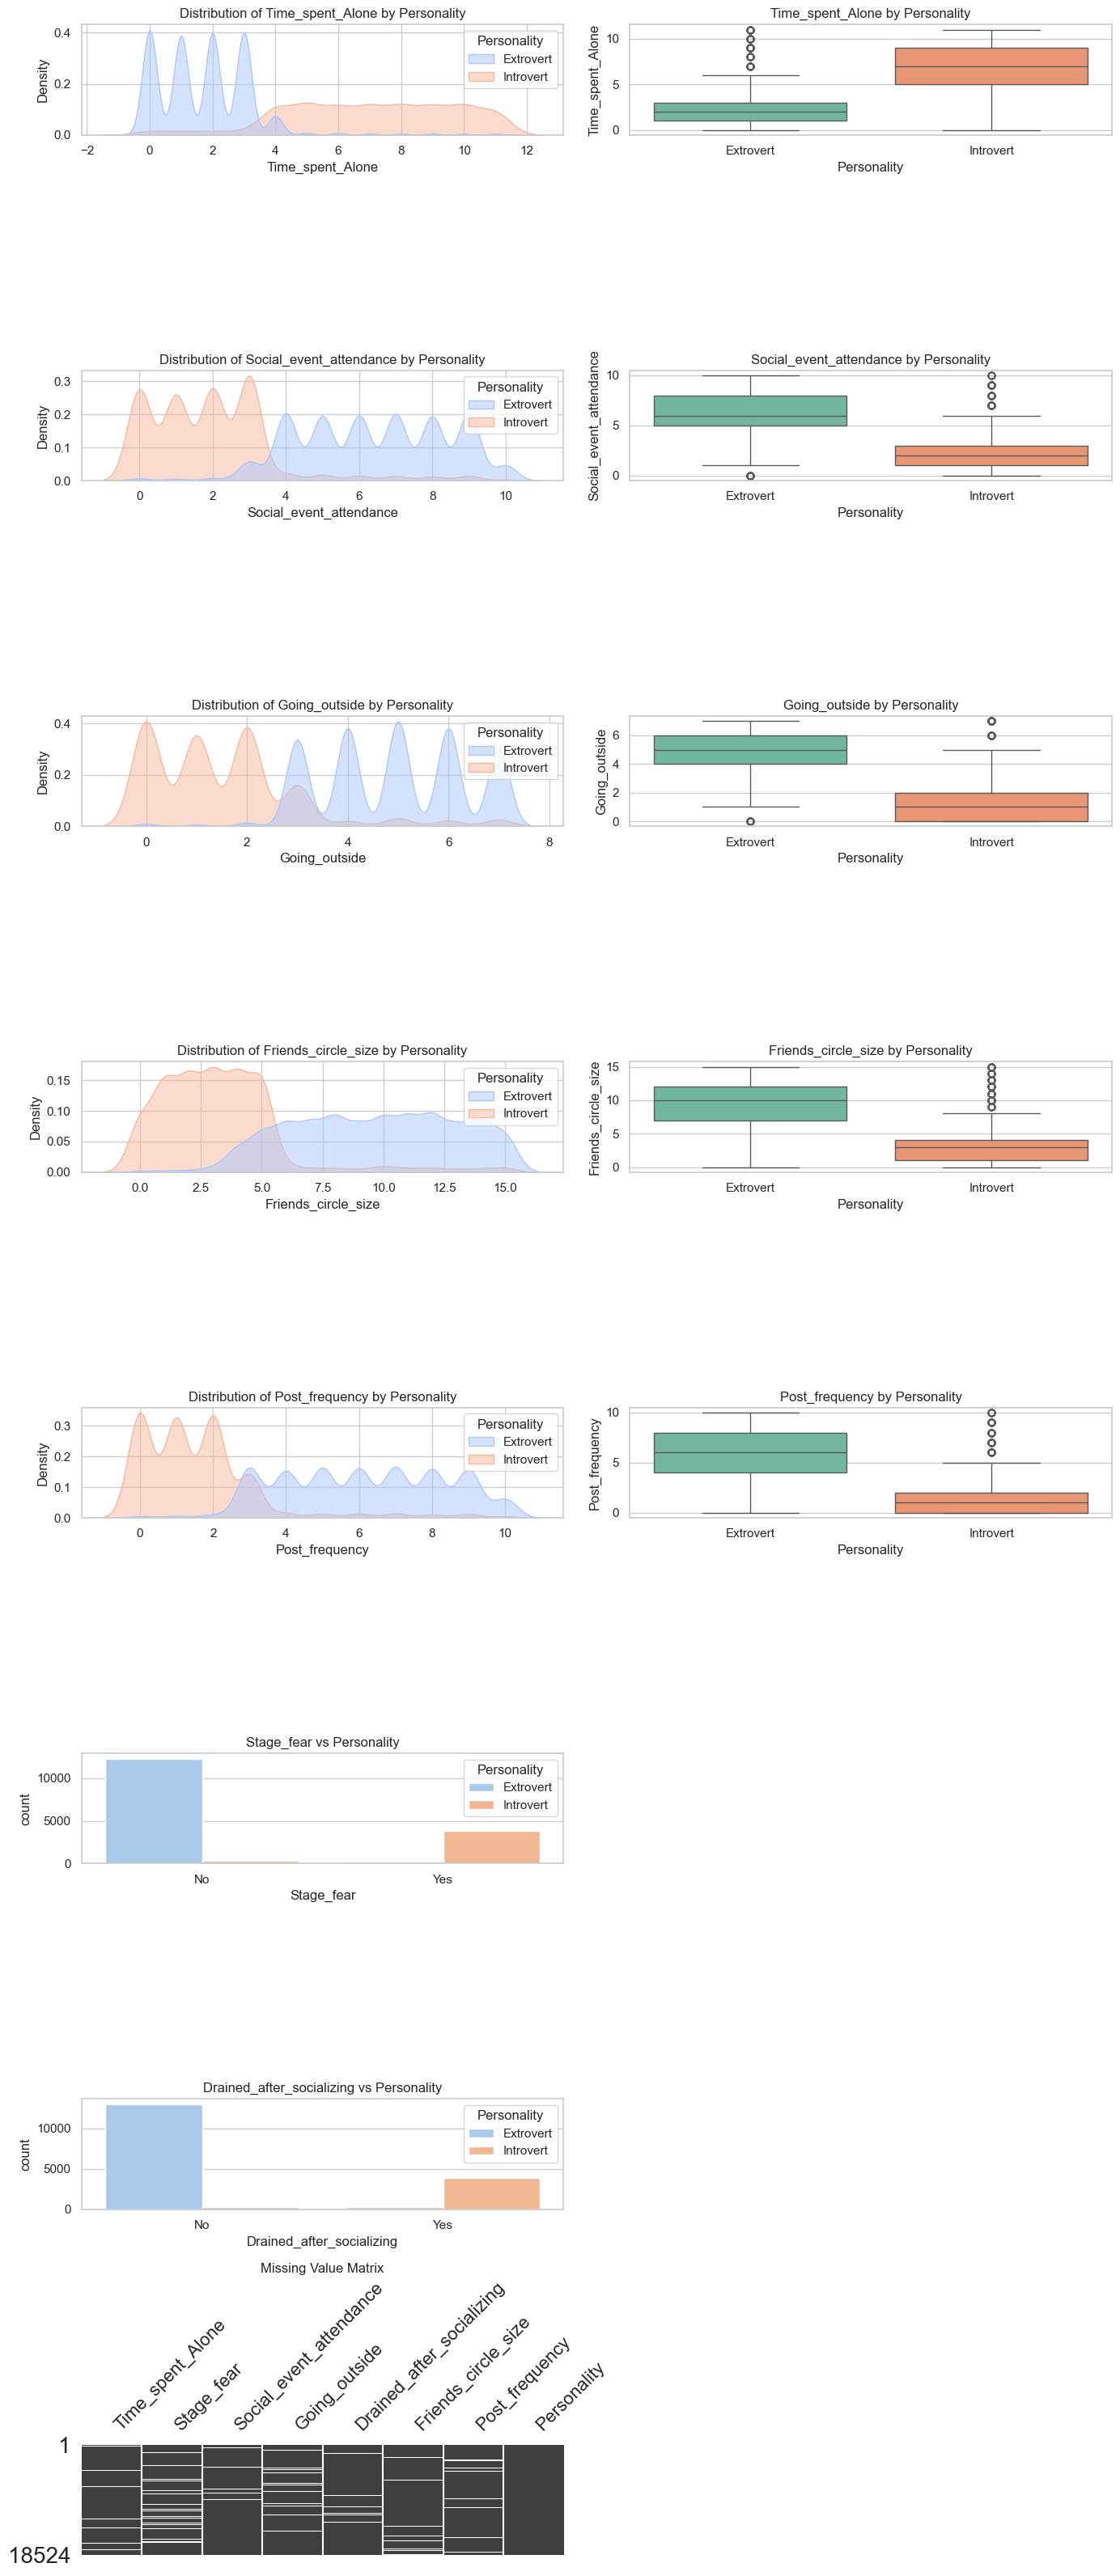

In [6]:
%pip install missingno

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')  # Suppress all warnings


# Data for EDA
eda_df = train.drop(columns=['id'])
num_features = ['Time_spent_Alone', 'Social_event_attendance', 
                'Going_outside', 'Friends_circle_size', 'Post_frequency']
cat_features = ['Stage_fear', 'Drained_after_socializing']

fig, axes = plt.subplots(
    nrows=len(num_features) + len(cat_features) + 1,  # +1 for missingno
    ncols=2,
    figsize=(14, 4*(len(num_features) + len(cat_features) + 1))
)

#  Numerical distributions (KDE + Box)
for i, col in enumerate(num_features):
    # KDE
    sns.kdeplot(
        data=eda_df, x=col, hue='Personality',
        fill=True, common_norm=False, palette='coolwarm', alpha=0.5,
        ax=axes[i, 0]
    )
    axes[i, 0].set_title(f'Distribution of {col} by Personality')

    # Boxplot
    sns.boxplot(
        data=eda_df, x='Personality', y=col, palette='Set2',
        ax=axes[i, 1]
    )
    axes[i, 1].set_title(f'{col} by Personality')

# Categorical countplots
start_cat = len(num_features)
for j, col in enumerate(cat_features):
    sns.countplot(
        data=eda_df, x=col, hue='Personality', palette='pastel',
        ax=axes[start_cat + j, 0]
    )
    axes[start_cat + j, 0].set_title(f'{col} vs Personality')
    axes[start_cat + j, 1].axis('off')  # Empty col for aesthetics

# 3. Missing value matrix in the last row
msno.matrix(eda_df, ax=axes[-1, 0])
axes[-1, 0].set_title('Missing Value Matrix')
axes[-1, 1].axis('off')

# Save before showing
fig.savefig("eda_dashboard.png", dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import warnings

warnings.filterwarnings('ignore')


# Drop ID column
train = train.drop(columns=['id'])
test_IDs = test['id']  # Keep for submission later
test = test.drop(columns=['id'])

# Separate features and target
y_train = train['Personality']
X_train = train.drop(columns=['Personality'])

# Identify columns by dtype
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X_train.select_dtypes(exclude=[np.number]).columns.tolist()

# Imputation
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
test[num_cols] = num_imputer.transform(test[num_cols])

X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
test[cat_cols] = cat_imputer.transform(test[cat_cols])

# Encoding (binary Yes/No to 1/0)
le = LabelEncoder()
for col in cat_cols + ['Personality']:
    if col in X_train.columns:
        X_train[col] = le.fit_transform(X_train[col])
        test[col] = le.transform(test[col])
    elif col == 'Personality':
        y_train = le.fit_transform(y_train)

# Final check
print("Training data shape:", X_train.shape)
print("Test data shape:", test.shape)
print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)
print("Target distribution:", np.bincount(y_train))

Training data shape: (18524, 7)
Test data shape: (6175, 7)
Numerical columns: ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
Categorical columns: ['Stage_fear', 'Drained_after_socializing']
Target distribution: [13699  4825]


Balanced Accuracy: 0.9596
Macro F1-score:   0.9546

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      2740
           1       0.92      0.95      0.93       965

    accuracy                           0.96      3705
   macro avg       0.95      0.96      0.95      3705
weighted avg       0.97      0.96      0.96      3705



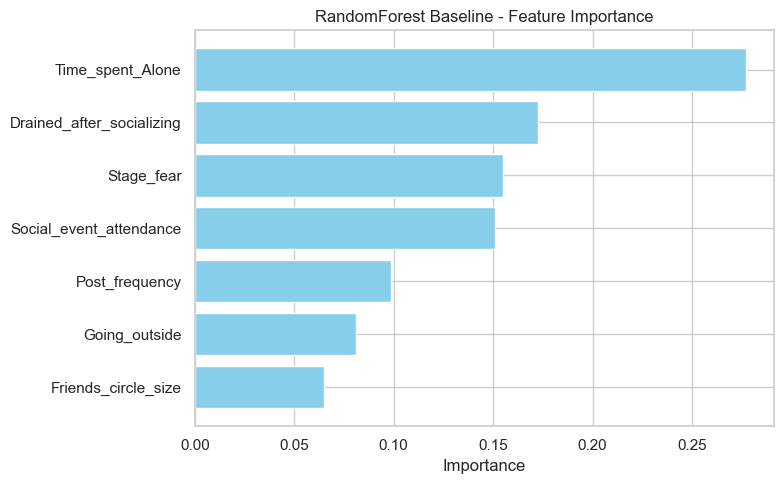

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Train/validation split
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Baseline model: RandomForest with imbalance handling
rf_baseline = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)
rf_baseline.fit(X_tr, y_tr)

# Validation predictions
y_pred = rf_baseline.predict(X_val)

# Metrics
bal_acc = balanced_accuracy_score(y_val, y_pred)
macro_f1 = f1_score(y_val, y_pred, average='macro')

print(f"Balanced Accuracy: {bal_acc:.4f}")
print(f"Macro F1-score:   {macro_f1:.4f}")
print("\nClassification Report:\n", classification_report(y_val, y_pred))

# Feature importance plot
importances = rf_baseline.feature_importances_
indices = np.argsort(importances)[::-1]
features_sorted = X_train.columns[indices]
importances_sorted = importances[indices]

plt.figure(figsize=(8, 5))
plt.barh(features_sorted, importances_sorted, color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("RandomForest Baseline - Feature Importance")
plt.tight_layout()
plt.show()

# Keep sorted feature importance in a DataFrame for later
feature_importance_df = pd.DataFrame({
    "Feature": features_sorted,
    "Importance": importances_sorted
})

In [10]:
%pip install lightgbm

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# LightGBM baseline
lgbm_model = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)
lgbm_model.fit(X_tr, y_tr)
y_pred_lgbm = lgbm_model.predict(X_val)

lgbm_bal_acc = balanced_accuracy_score(y_val, y_pred_lgbm)
lgbm_macro_f1 = f1_score(y_val, y_pred_lgbm, average='macro')

# XGBoost baseline
xgb_model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    random_state=42,
    scale_pos_weight=(len(y_tr) - sum(y_tr)) / sum(y_tr),  # class balance
    n_jobs=-1,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_tr, y_tr)
y_pred_xgb = xgb_model.predict(X_val)

xgb_bal_acc = balanced_accuracy_score(y_val, y_pred_xgb)
xgb_macro_f1 = f1_score(y_val, y_pred_xgb, average='macro')

# Results table
results_df = pd.DataFrame({
    'Model': ['RandomForest', 'LightGBM', 'XGBoost'],
    'Balanced Accuracy': [bal_acc, lgbm_bal_acc, xgb_bal_acc],
    'Macro F1': [macro_f1, lgbm_macro_f1, xgb_macro_f1]
})

print(results_df)

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 10.9 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.
[LightGBM] [Info] Number of positive: 3860, number of negative: 10959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000670 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 62
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
          Model  Balanced Accuracy  Macro F1
0  RandomForest           0.959648  0.954608
1      LightGBM           0.962568  0.959942
2       XGBoost           0.963144  0.961595


   ---------------------------------------- 0.0/544.4 kB ? eta -:--:--
   ---------------------------------------- 544.4/544.4 kB 9.1 MB/s  0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 15.0 MB/s  0:00:00
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:--
   --- ------------------------------------ 2.9/30.3 MB 16.8 MB/s eta 0:00:02
   ------- -------------------------------- 6.0/30.3 MB 16.1 MB/s eta 0:00:02
   ---------- ----------------------------- 8.1/30.3 MB 14.4 MB/s eta 0:00:02
   ----------- ---------------------------- 8.4/30.3 MB 11.1 MB/s eta 0:00:02
   ------------ --------------------------- 9.2/30.3 MB 10.0 MB/s eta 0:00:03
   ------------- -------------------------- 10.5/30.3 MB 9.1 MB/s eta 0:00:03
   --------------- ------------------------ 11.5/30.3 MB 8.1 MB/s eta 0:00:03
   ---------------- ----------------------- 12.3/30.3 MB 7.6 MB/s eta 0:00:03
   ------------

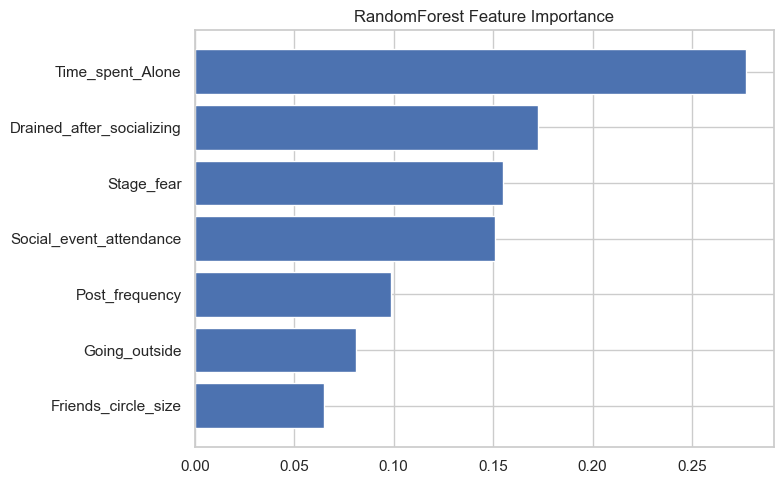

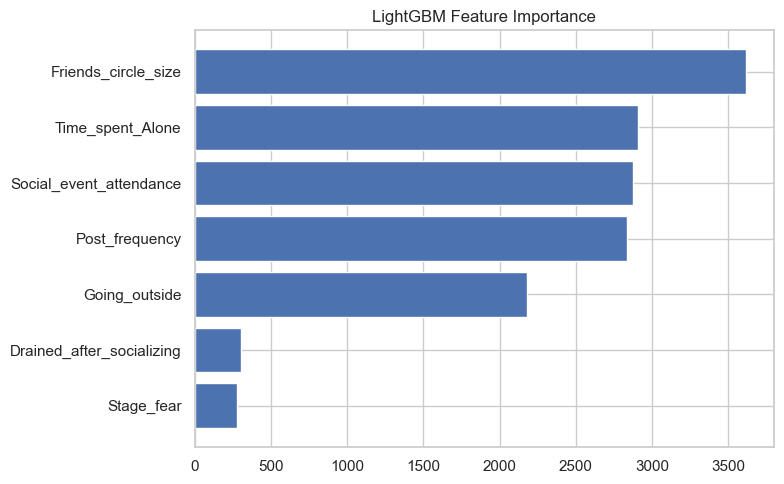

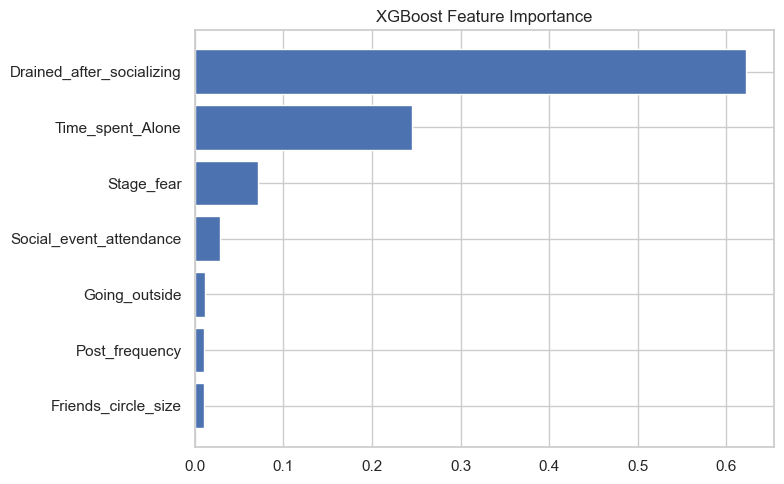

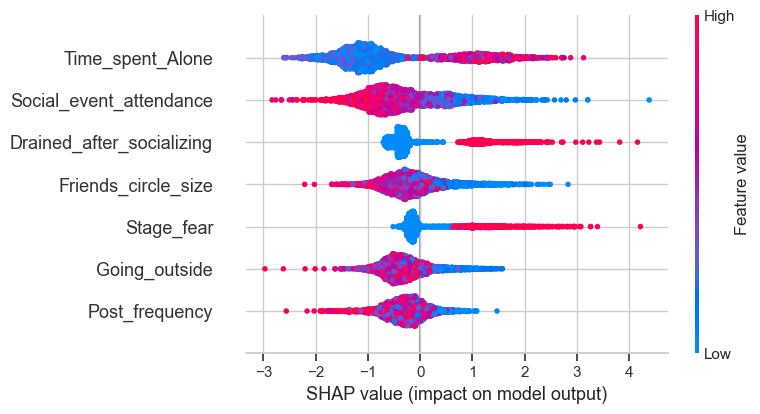

In [12]:
%pip install shap

import shap
import matplotlib.pyplot as plt

#  Feature Importances (side-by-side comparison)
def plot_feature_importance(model, model_name, feature_names):
    importances = model.feature_importances_
    sorted_idx = importances.argsort()
    plt.figure(figsize=(8, 5))
    plt.barh([feature_names[i] for i in sorted_idx], importances[sorted_idx])
    plt.title(f"{model_name} Feature Importance")
    plt.tight_layout()
    plt.show()

plot_feature_importance(rf_baseline, "RandomForest", X_train.columns)
plot_feature_importance(lgbm_model, "LightGBM", X_train.columns)
plot_feature_importance(xgb_model, "XGBoost", X_train.columns)

#  SHAP summary for XGBoost
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_val)

plt.figure()
shap.summary_plot(shap_values, X_val, feature_names=X_train.columns)
plt.show()

In [13]:
#  Retrain XGB on full training data
final_xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    random_state=42,
    scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train),
    n_jobs=-1,
    use_label_encoder=False,
    eval_metric='logloss'
)
final_xgb.fit(X_train, y_train)

#  Predict & save submission
test_preds = final_xgb.predict(test)

# Convert 0/1 back to original Personality labels
submission = pd.DataFrame({
    'id': test_IDs,
    'Personality': test_preds
})
submission['Personality'] = submission['Personality'].map({0: 'Extrovert', 1: 'Introvert'})

submission_path = "final_xgb_submission.csv"
submission.to_csv(submission_path, index=False)
print(f"Submission saved to {submission_path}")

Submission saved to final_xgb_submission.csv


In [14]:
# Predictions on validation set
val_preds = final_xgb.predict(X_val)

# Metrics
bal_acc = balanced_accuracy_score(y_val, val_preds)
macro_f1 = f1_score(y_val, val_preds, average='macro')

print(f"Balanced Accuracy: {bal_acc:.4f}")
print(f"Macro F1-score: {macro_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, val_preds))

Balanced Accuracy: 0.9677
Macro F1-score: 0.9658

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2740
           1       0.94      0.96      0.95       965

    accuracy                           0.97      3705
   macro avg       0.96      0.97      0.97      3705
weighted avg       0.97      0.97      0.97      3705

